# Predict Customer Clicked Ads Classification by Using Machine Learning

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import rcParams

pd.options.display.max_columns = None

custom_rc = {'figure.figsize': (12,8),
             'axes.labelsize': 14,
             'figure.titlesize': 18}
rcParams.update(custom_rc)

In [2]:
plt.style.use('ggplot')

## About This Dataset
[This dataset](https://drive.google.com/file/d/1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl/view) distributed by Rakamin Academy appears to be a modified version of [Click on Ad Dataset](https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad) on Kaggle. From a quick Google search, the oldest recorded version of this data on Kaggle can be found [here](https://www.kaggle.com/code/farhanmd29/predicting-customer-ad-clicks/notebook) stating that it's from a private dataset. There is no information found about how this dataset was acquired.

Ads performance is important to achieve a successful marketing. In this case, I take the role of a data scientist working for a company in Indonesia. This company wants to evaluate their ads effectiveness using their historical advertisement data. The objective of this case will be to help the company to determine the marketing target using classification algorithm machine learning.

In [3]:
filepath = "Clicked Ads Dataset.csv"
df_raw = pd.read_csv(filepath, index_col=0)
df = df_raw.copy()
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


The columns are easy to understand and self-explanatory. Here are the columns' descriptions in consideration to their values:
- **Daily Time Spent on Site**: daily time spent by customers on the site in minutes
- **Age**: customers' ages in years
- **Area Income**: customers' average income based on neighborhood area, possibly in Rupiah
- **Daily Internet Usage**: daily time spent by customers on the internet in minutes
- **Male**: customers' gender
- **Timestamp**: timestamps for action taken by customers on seeing ad
- **Clicked on Ad**: actions taken by customers on seeing ad, 'Yes' if customers click on ad and 'No' if customers click away to leave webpage without clicking on ad
- **city**: customers' cities
- **province**: customers' province
- **category**: categories of ads seen by customers

From quick overview based on the columns' values, **Male** column should have values of 'Yes' or 'No' or binary numbers instead of gender values 'Perempuan' or 'Laki-Laki'.

There are some missing values in some columns found.

In [5]:
# Rename columns for accessibility
col_rename = {'Daily Time Spent on Site': 'DailyTimeOnSite',
              'Area Income': 'AreaIncome',
              'Daily Internet Usage': 'DailyNetUsage',
              'Clicked on Ad': 'AdClick'}
df.rename(columns=col_rename, inplace=True)

## Customer Type and Behaviour Analysis on Advertisement
Before going to data preparation, let's try to understand the problem at hand first. It's important to see the customer base of the company to see their behaviour towards the company's ads previously.

### Univariate Analysis
For this section, I will be focusing on the impact of 3 features towards customers' decision to click on ads. The features are **Age**, **DailyTimeOnSite**, and **DailyNetUsage**

#### Age

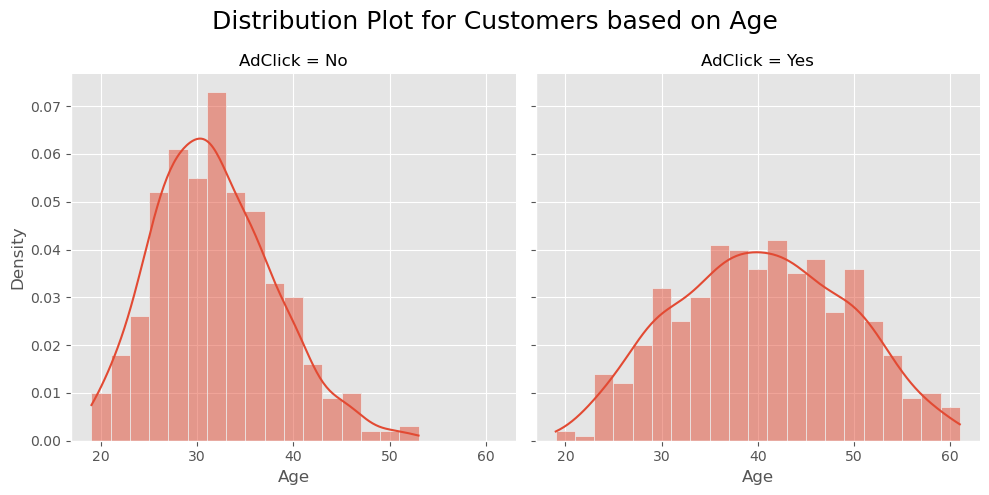

In [6]:
g = sns.FacetGrid(df, col='AdClick', height=5)
plt.suptitle('Distribution Plot for Customers based on Age')
g.map(sns.histplot, 'Age', stat='density', kde=True, binwidth=2)
plt.show()

Based on the graph above, the customers who clicked on ad are somewhere within the age range of 19-61 years old. However, for customers who didn't click on ad, the age range seems to be in the range of 19-53. 

Based on their distributions, both graph show normal distribution. However, for customers who didn't click on ad, the distribution is the highest in age range of 25-35 years old. That can possibly mean that the previous ads failed to attract customers in that age range.

#### Daily Time Spent on Site

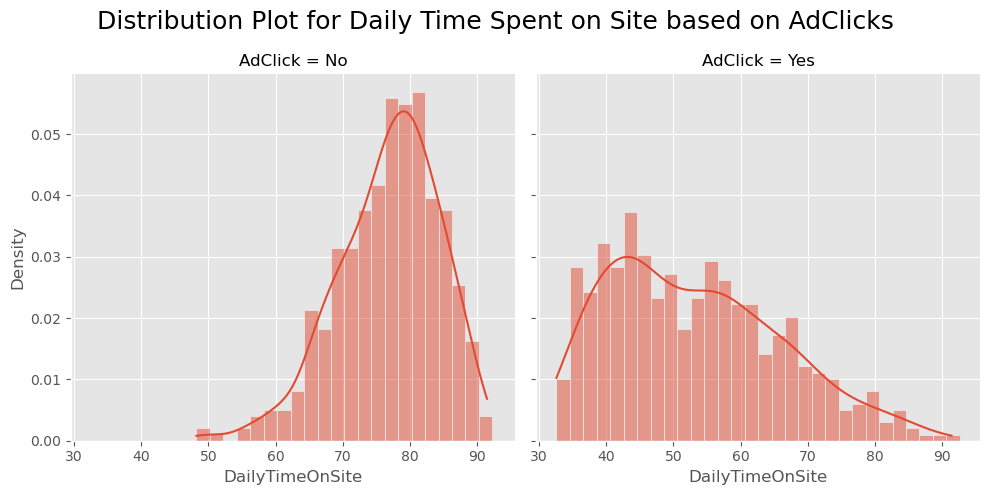

In [7]:
g = sns.FacetGrid(df, col='AdClick', height=5)
plt.suptitle('Distribution Plot for Daily Time Spent on Site based on AdClicks')
g.map(sns.histplot, 'DailyTimeOnSite', stat='density', kde=True, binwidth=2)
plt.show()

Based on graph above, customers who didn't click on ad are mostly distributed on the higher end of daily time spent on site in range between 68-88 minutes. Meanwhile, for customers who clicked on ad, the distribution is more spreadout with the majority spent between 34-68 minutes daily on site.

#### Daily Internet Usage

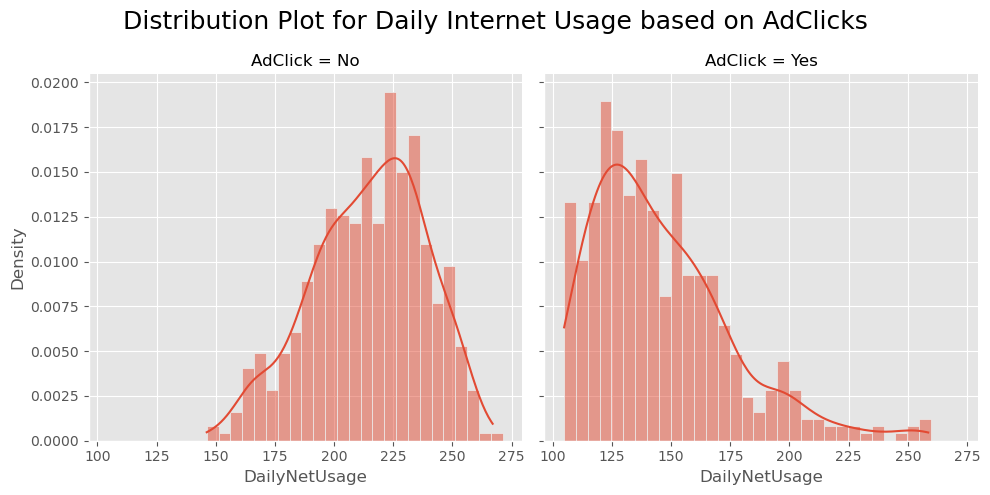

In [8]:
g = sns.FacetGrid(df, col='AdClick', height=5)
plt.suptitle('Distribution Plot for Daily Internet Usage based on AdClicks')
g.map(sns.histplot, 'DailyNetUsage', stat='density', kde=True, binwidth=5)
plt.show()

Based on graph above, customers who didn't click on ad are mostly distributed on the higher end of the duration, just like with daily time spent. For daily internet usage, most of the customers who didn't click are distributed in the range of 185-250 minutes daily, while most of customers who click are distributed in the range of 105-170 minutes daily.

Based on daily time spent and daily internet usage, it appears that customers who generally spends less time online are the one more interested to click on ad. These are possibly tied to the age demographic where the younger customers age range is the more they spend time on site and online. In this case, one hypothesis that I take will be that the previous ads weren't interesting enough for younger customerbase below 40 years old. That can be a problem since there is quite a big distribution of customerbase there. 

### Bivariate Analysis

#### Impact of 3 Requested Features towards AdClick
Let's take another look on the previous 3 features using boxplot.

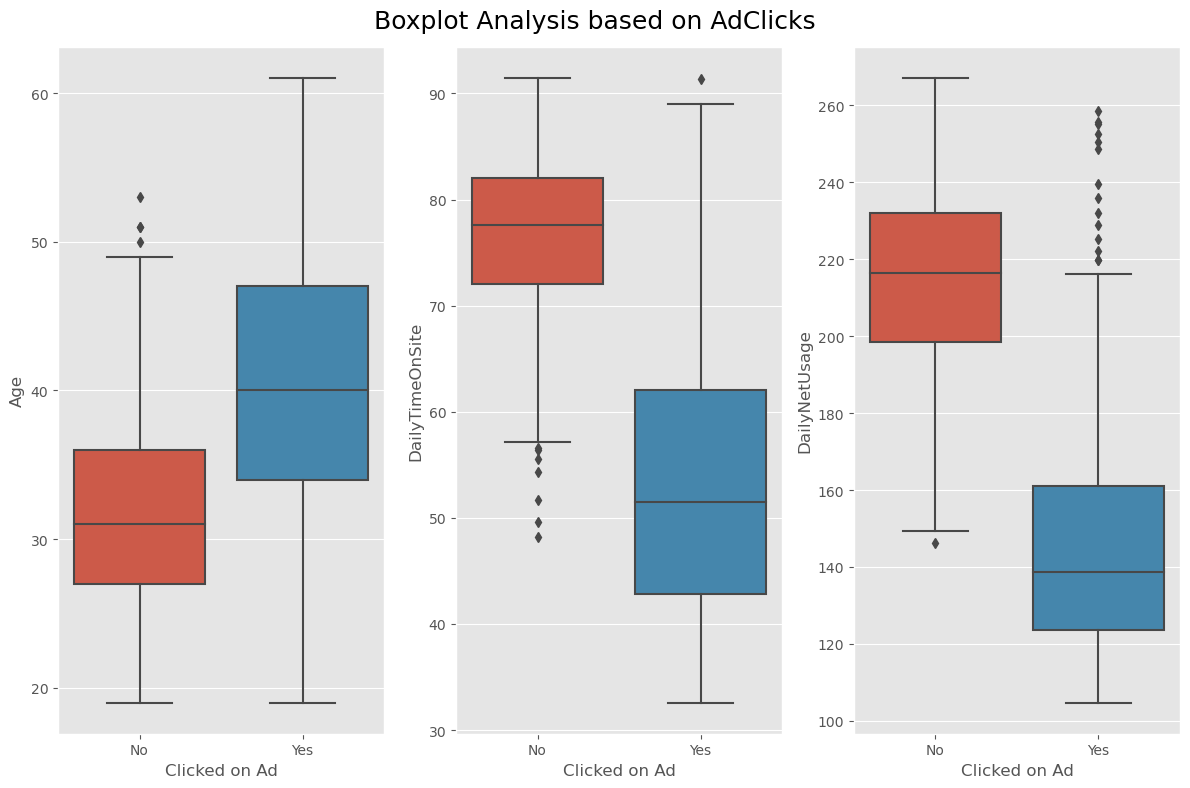

In [13]:
req_features = ['Age', 'DailyTimeOnSite', 'DailyNetUsage']
plt.suptitle('Boxplot Analysis based on AdClicks')
for i, col in enumerate(req_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], x=df.AdClick)
    plt.xlabel('Clicked on Ad')
plt.tight_layout()
plt.show()

From the graph above, we can see that for customers who clicked on add based on age, it is in fact normal distribution. For customers who didn't click on add based on age, there are small amount of outlier found, so do distributions in the other 2 features.

From the graph, we can also observe that for daily time spent on site and daily internet usage have similar distribution pattern as expected. It might be a good idea to take a closer look using multivariate analysis to see how they correlate with each others.

### Multivariate Analysis

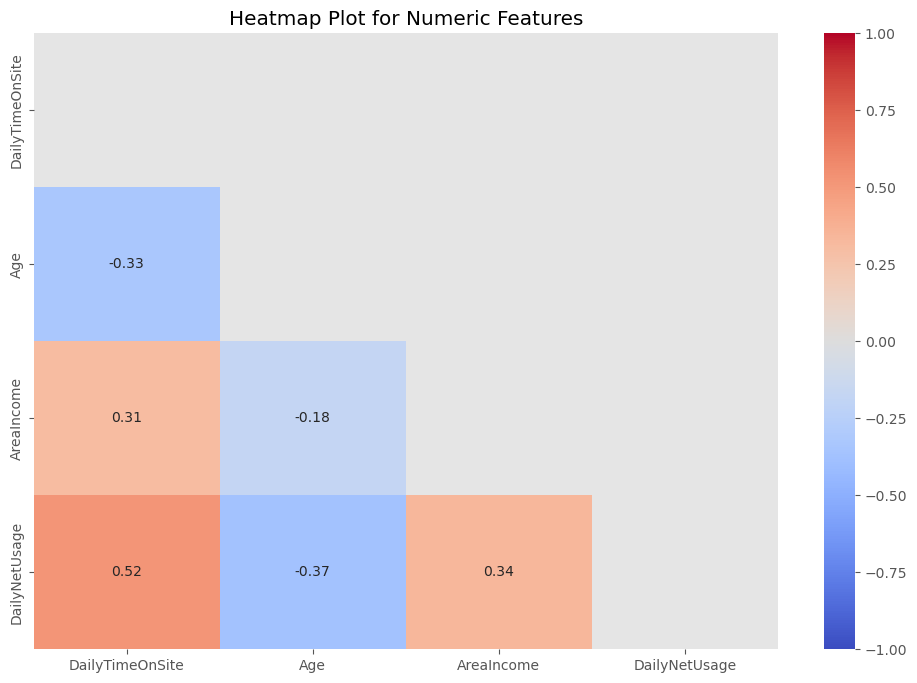

In [36]:
plt.title('Heatmap Plot for Numeric Features')
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask=mask, )
plt.show()

As expected from before, **Age** has negative correlations with the other numerical features. The correlation between **Age** and **AreaIncome** is on the weaker side, meanwhile the strongest correlation is found between **DailyTimeOnSite** and **DailyNetUsage** at 0.52 positive correlation. 

Negative correlations found between **Age** and both time features could be attributed to older demographic being less tech-savvy. Meanwhile, positive correlations found between **AreaIncome** and both time features could be attributed to higher area income might mean a better internet infrastructure that encourage more usage.

The strong correlation between **DailyNetUsage** and **DailyTimeOnSite** is pretty self-explanatory since **DailyTimeOnSite** can be seen as a subset of time spent on the internet. That being said, despite having less than 0.8 correlation, one can argue that both features can be seen as redundant due to the nature of **DailyTimeOnSite** being a part of **DailyNetUsage**.